In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data = pd.read_csv('train_data.csv')
data.head()

,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,P784
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,254,255,255,254,255,255,255,255,0,...,255,255,255,255,255,255,255,255,255,255
2,0,255,254,255,255,254,255,253,255,254,...,254,255,254,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,255,255,253,...,255,255,255,255,255,255,255,255,255,255


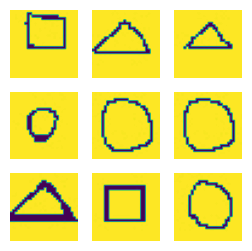

In [15]:
plt.figure(figsize=(3,3))
rows=col = 3
for i in range(9):
    j=np.random.randint(0,200)
    plt.subplot(rows, col, i+1)
    img_arr = data.iloc[j,1:].values.reshape(28,28)
    plt.imshow(img_arr)
    plt.axis('off')

In [16]:
X=data.iloc[:,1:].values.astype('float32')
y=data.iloc[:,0].values.astype('int32')

X = X/255.5

In [17]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y.shape

(200, 3)

In [18]:
X=X.reshape(-1,28,28,1)
X.shape

(200, 28, 28, 1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

/Users/bhagya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,083 (492.51 KB)

 Trainable params: 126,083 (492.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, y_train, epochs = 100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - acc: 0.3708 - loss: 1.0905 - val_acc: 0.5312 - val_loss: 1.0168
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4208 - loss: 1.0610 - val_acc: 0.5312 - val_loss: 0.9942
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4187 - loss: 1.0301 - val_acc: 0.5312 - val_loss: 0.9536
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4125 - loss: 1.0181 - val_acc: 0.5312 - val_loss: 0.9136
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4677 - loss: 0.9295 - val_acc: 0.5312 - val_loss: 0.8200
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5250 - loss: 0.8465 - val_acc: 0.7500 - val_loss: 0.7377
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7156 - loss: 0.7890 - val_acc: 0.7500 - val_loss: 0.6049
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7333 - loss: 0.6831 - val_acc: 0.7500 - val_loss: 0.5908
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8250 - loss: 

In [24]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 0.0082     


[0.0121657345443964, 1.0]